In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import and resize image data to the list 'images'
import cv2
import os
import glob
import PIL
from PIL import Image
img_dir = "/content/drive/My Drive/data-X/dataset/training_gallary"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
images = []
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #convert from RGB to BGR
    img = cv2.resize(img, (32, 32))  #resize the images
    images.append(img)

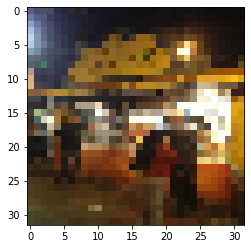

In [3]:
import matplotlib.pyplot as plt
img = plt.imshow(images[0])

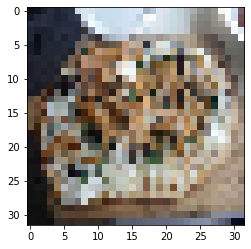

In [4]:
img = plt.imshow(images[5])

In [0]:
import os
from PIL import Image
import numpy as np

path = '/content/drive/My Drive/data-X/dataset/training_gallary'
# Store the image file names in a list as long as they are jpgs
image_names = [f for f in os.listdir(path) if os.path.splitext(f)[-1] == '.jpg']
image_names = [int(i.split('.')[0]) for i in image_names]


In [0]:
#convert images and image_names to arrays
images = np.asarray(images, dtype=np.float32)
image_names = np.asarray(image_names, dtype=np.int)

In [7]:
images[0]

array([[[ 90.,  94., 129.],
        [ 69.,  77., 114.],
        [ 75.,  79., 105.],
        ...,
        [ 15.,  14.,  12.],
        [ 16.,  15.,  13.],
        [ 14.,  13.,  13.]],

       [[115., 119., 166.],
        [ 88.,  93., 135.],
        [ 87.,  88., 119.],
        ...,
        [ 17.,  11.,  11.],
        [ 17.,  13.,  12.],
        [ 16.,  10.,  10.]],

       [[146., 157., 202.],
        [110., 119., 162.],
        [ 86.,  90., 128.],
        ...,
        [ 20.,  15.,  12.],
        [ 18.,  14.,  11.],
        [ 20.,  15.,  12.]],

       ...,

       [[ 87.,  82.,  46.],
        [ 87.,  74.,  39.],
        [ 84.,  64.,  36.],
        ...,
        [ 42.,  25.,  14.],
        [ 40.,  17.,   9.],
        [ 44.,  28.,  12.]],

       [[ 69.,  69.,  38.],
        [ 68.,  67.,  39.],
        [ 73.,  65.,  39.],
        ...,
        [ 51.,  30.,  13.],
        [ 34.,  15.,   8.],
        [ 33.,  23.,  12.]],

       [[ 73.,  72.,  41.],
        [ 68.,  62.,  37.],
        [ 63.,  

In [8]:
image_names[0]

101085

In [9]:
#create the map (map photo_id to labels)
import pandas as pd
train = pd.read_csv('/content/drive/My Drive/data-X/dataset/train.csv')
train_p2b = pd.read_csv('/content/drive/My Drive/data-X/dataset/train_photo_to_biz_ids.csv')
df = pd.merge(train_p2b, train, how='left',left_on='business_id',right_on='business_id')
df['labels'] = df['labels'].astype(str)
len(df)

234842

In [10]:
train.head()

,business_id,labels
0,1000,1 2 3 4 5 6 7
1,1001,0 1 6 8
2,100,1 2 4 5 6 7
3,1006,1 2 4 5 6
4,1010,0 6 8


In [11]:
train_p2b.head()

,photo_id,business_id
0,204149,3034
1,52779,2805
2,278973,485
3,195284,485
4,19992,485


In [12]:
df.isnull().sum()

photo_id       0
business_id    0
labels         0
dtype: int64

In [13]:
df.isna().sum()

photo_id       0
business_id    0
labels         0
dtype: int64

In [14]:
df.head()

,photo_id,business_id,labels
0,204149,3034,3 8
1,52779,2805,1 2 3 5 6 7
2,278973,485,1 2 3 4 5 6 7
3,195284,485,1 2 3 4 5 6 7
4,19992,485,1 2 3 4 5 6 7


In [15]:
del df['business_id']
df['labels'] = df['labels'].apply(lambda x: x.split(' '))
df.head()

,photo_id,labels
0,204149,"[3, 8]"
1,52779,"[1, 2, 3, 5, 6, 7]"
2,278973,"[1, 2, 3, 4, 5, 6, 7]"
3,195284,"[1, 2, 3, 4, 5, 6, 7]"
4,19992,"[1, 2, 3, 4, 5, 6, 7]"


In [16]:
len(images) #there are 1298 images in the training set

1298

In [17]:
image_names

array([101085,  10118,  10116, ..., 101078, 101081, 101083])

In [18]:
df.shape #df is the whole map of photo to labels (more than what we have in our training gallary)

(234842, 2)

In [19]:
#use image_names to create an array of labels
names = pd.DataFrame(image_names)
names = names.rename(columns={0: "image_names"})
data = pd.merge(names, df, how='left', left_on='image_names',right_on='photo_id')
data['photo'] = data['photo_id'].astype(str)+'.jpg'
del data['image_names']
del data['photo_id']
data

,labels,photo
0,"[0, 3, 8]",101085.jpg
1,"[1, 2, 5, 6, 8]",10118.jpg
2,"[1, 2, 3, 4, 5, 6, 7, 8]",10116.jpg
3,"[3, 8]",101089.jpg
4,"[1, 2, 3, 4, 5, 6, 7]",10119.jpg
...,...,...
1293,"[0, 1, 6, 8]",100910.jpg
1294,"[1, 2, 4, 5, 6, 7]",100912.jpg
1295,"[0, 4, 5, 8]",101078.jpg
1296,"[0, 8]",101081.jpg


In [0]:
#create a dictionary for labels
dic = {'0': 'good_for_lunch', '1': 'good_for_dinner','2': 'takes_reservations', '3': 'outdoor_seating', '4': 'restaurant_is_expensive', '5': 'has_alcohol', '6': 'has_table_service', '7': 'ambience_is_classy', '8': 'good_for_kids'}

In [21]:
#convert labels to words
for num, words in dic.items():
  for ind in range(0, len(data['labels'])):
    data['labels'][ind] = [ele.replace(num, words) for ele in data['labels'][ind]]
data

,labels,photo
0,"[good_for_lunch, outdoor_seating, good_for_kids]",101085.jpg
1,"[good_for_dinner, takes_reservations, has_alco...",10118.jpg
2,"[good_for_dinner, takes_reservations, outdoor_...",10116.jpg
3,"[outdoor_seating, good_for_kids]",101089.jpg
4,"[good_for_dinner, takes_reservations, outdoor_...",10119.jpg
...,...,...
1293,"[good_for_lunch, good_for_dinner, has_table_se...",100910.jpg
1294,"[good_for_dinner, takes_reservations, restaura...",100912.jpg
1295,"[good_for_lunch, restaurant_is_expensive, has_...",101078.jpg
1296,"[good_for_lunch, good_for_kids]",101081.jpg


In [0]:
data = data[['photo','labels']]

In [0]:
#define a function multi-label multi-hot-encoding
def m_one_hot(data):
  classes = ['good_for_lunch', 'good_for_dinner', 'takes_reservations', 'outdoor_seating', 'restaurant_is_expensive', 'has_alcohol', 'has_table_service', 'ambience_is_classy',  'good_for_kids']
  answer = []
  for e in classes:
    if e in data['labels']:
      answer.append(1)
    else:
      answer.append(0)
  return answer

In [24]:
data2 = data.copy()
data2['multi_hot'] = data2.apply(m_one_hot, axis=1)
data2

,photo,labels,multi_hot
0,101085.jpg,"[good_for_lunch, outdoor_seating, good_for_kids]","[1, 0, 0, 1, 0, 0, 0, 0, 1]"
1,10118.jpg,"[good_for_dinner, takes_reservations, has_alco...","[0, 1, 1, 0, 0, 1, 1, 0, 1]"
2,10116.jpg,"[good_for_dinner, takes_reservations, outdoor_...","[0, 1, 1, 1, 1, 1, 1, 1, 1]"
3,101089.jpg,"[outdoor_seating, good_for_kids]","[0, 0, 0, 1, 0, 0, 0, 0, 1]"
4,10119.jpg,"[good_for_dinner, takes_reservations, outdoor_...","[0, 1, 1, 1, 1, 1, 1, 1, 0]"
...,...,...,...
1293,100910.jpg,"[good_for_lunch, good_for_dinner, has_table_se...","[1, 1, 0, 0, 0, 0, 1, 0, 1]"
1294,100912.jpg,"[good_for_dinner, takes_reservations, restaura...","[0, 1, 1, 0, 1, 1, 1, 1, 0]"
1295,101078.jpg,"[good_for_lunch, restaurant_is_expensive, has_...","[1, 0, 0, 0, 1, 1, 0, 0, 1]"
1296,101081.jpg,"[good_for_lunch, good_for_kids]","[1, 0, 0, 0, 0, 0, 0, 0, 1]"


In [25]:
X = images
labels = data2['multi_hot'].to_frame().values
Y = []
for i in range(0,len(labels)):
  Y.append(np.asarray(labels[i][0]))
Y = np.asarray(Y)
print('X is: ',X.shape)
print('Y is: ',Y.shape)

X is:  (1298, 32, 32, 3)
Y is:  (1298, 9)


In [0]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=1)

In [0]:
#baseline prediction
# make all one predictions
train_yhat = np.asarray([np.ones(9) for _ in range(trainY.shape[0])])
test_yhat = np.asarray([np.ones(9) for _ in range(testY.shape[0])])

In [0]:
def avgED(y, py):
  from scipy.spatial import distance
  tsum = 0
  for i in range(len(y)):
    tsum += distance.euclidean(y[i], py[i])
  return tsum/len(y)

In [29]:
train_allones_AED = avgED(trainY, train_yhat)
test_allones_AED = avgED(testY, test_yhat)
print('All Ones (Average Euclidean): train=%.3f, test=%.3f' % (train_allones_AED, test_allones_AED))

All Ones (Average Euclidean): train=2.021, test=2.015


In [0]:
# define cnn model
def define_model(in_shape=(32, 32, 3), out_shape=9):
	from keras.models import Sequential	
	from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(out_shape, activation='sigmoid'))
	# compile model
	opt = optimizers.SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
	return model

In [31]:
# create data generator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

Using TensorFlow backend.


In [0]:
# prepare iterators
train_it = datagen.flow(trainX, trainY, batch_size=50)
test_it = datagen.flow(testX, testY, batch_size=50)

In [0]:
#define evaluation metric AVERAGE EUCLIDEAN DEISTANCE
import keras.backend as K
def AEUD(y_true, y_pred):
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

In [0]:
# define cnn model
def define_EU_model(in_shape=(32, 32, 3), out_shape=9):
	from keras.models import Sequential	
	from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(out_shape, activation='sigmoid'))
	# compile model
	opt = optimizers.SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[AEUD])
	return model

In [0]:
model2 = define_EU_model()

In [37]:
loss, eud = model2.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> loss=%.3f, average euclidean distance=%.3f' % (loss, eud))

> loss=0.752, average euclidean distance=1.582
